In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings                    
warnings.filterwarnings('ignore')
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
retention = pd.read_csv("/content/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [0]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [4]:
df=retention.copy()
df['Response_bin'] = df['Response'].apply(lambda X : 0 if X == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Response_bin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


##**Regression Analysis with Continuous Variables Only**

In [17]:
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

Customer Lifetime Value          8041
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
Response_bin                        2
dtype: int64

In [62]:
#Logit
continous_var_logit = sm.Logit(continous_var_df['Response_bin'], continous_var_df.drop('Response_bin', axis = 1))
print(continous_var_logit.fit().summary())
#Probit
continous_var_probit = sm.Probit(continous_var_df['Response_bin'], continous_var_df.drop('Response_bin', axis = 1))
print(continous_var_probit.fit().summary())
#Cloglog
continuous_var_cloglog = sm.GLM(continous_var_df['Response_bin'], continous_var_df.drop('Response_bin', axis = 1), family=sm.families.Binomial(sm.families.links.cloglog))
print(continuous_var_cloglog.fit().summary())

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 May 2020   Pseudo R-squ.:                -0.02546
Time:                        23:55:22   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.

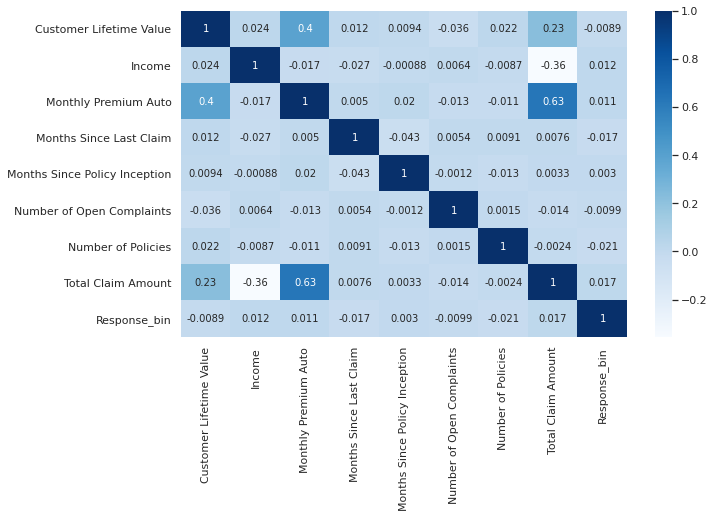

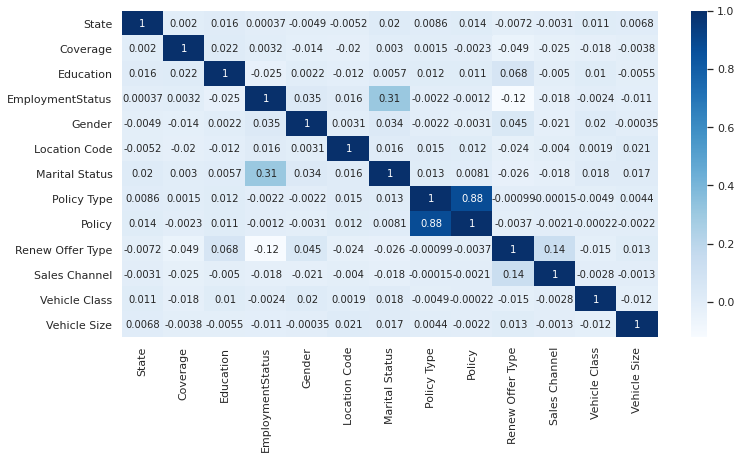

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True, cmap='Blues')
plt.show()
plt.figure(figsize=(12,6))
sns.heatmap(cat_df.corr(), annot = True, cmap='Blues')
plt.show()

##**Regression Analysis with Categorical Variables**

In [0]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Response','Customer','Effective To Date'], axis = 1)

In [0]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [23]:
cat_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,1,1,0,2,1,3,0,0,0,1


In [65]:
categorical_train.logit = sm.Logit(continous_var_df['Response_bin'], cat_df)
print(categorical_train.logit.fit().summary())
categorical_train.probit = sm.Probit(continous_var_df['Response_bin'], cat_df)
print(categorical_train.probit.fit().summary())
categorical_train.cloglog = sm.GLM(continous_var_df['Response_bin'], cat_df, family=sm.families.Binomial(sm.families.links.cloglog))
print(categorical_train.cloglog.fit().summary())

Optimization terminated successfully.
         Current function value: 0.387557
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9121
Method:                           MLE   Df Model:                           12
Date:                Mon, 18 May 2020   Pseudo R-squ.:                 0.05642
Time:                        00:01:46   Log-Likelihood:                -3539.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.224e-83
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0256      0.023     -1.122      0.262      -0.070       0.019
Coverage   

##**Regression Analysis with both Continous and Categorical Variables**

In [0]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)

In [26]:
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)
all_data_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response_bin,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,2,2,0,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,0,0,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,4,0,0,1,1,0,2,1,3,0,0,0,1


In [66]:
total_train.logit = sm.Logit(all_data_df['Response_bin'], all_data_df.drop(['Response_bin'], axis = 1))
print(total_train.logit.fit().summary())
total_train.probit = sm.Probit(all_data_df['Response_bin'], all_data_df.drop(['Response_bin'], axis = 1))
print(total_train.probit.fit().summary())
total_train.cloglog = sm.GLM(all_data_df['Response_bin'], all_data_df.drop(['Response_bin'], axis = 1), family=sm.families.Binomial(sm.families.links.cloglog))
print(total_train.cloglog.fit().summary())

Optimization terminated successfully.
         Current function value: 0.384709
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9113
Method:                           MLE   Df Model:                           20
Date:                Mon, 18 May 2020   Pseudo R-squ.:                 0.06336
Time:                        00:04:36   Log-Likelihood:                -3513.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.066e-88
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer_Lifetime_Value       -1.183e-05   5.11e-06     -2.317      0.

##**Regression Analysis with excluding Non-significant variables**

In [108]:
all_data_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount',
       'Response_bin', 'State', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [85]:
significant_cols = ['Customer_Lifetime_Value','Income','Monthly_Premium_Auto',
                    'Number_of_Policies','Total_Claim_Amount','Marital_Status',
                    'Renew_Offer_Type','Sales_Channel','Vehicle_Size']
trainData.logit = sm.Logit(all_data_df['Response_bin'], all_data_df[significant_cols])
print(trainData.logit.fit().summary())
trainData.probit = sm.Probit(all_data_df['Response_bin'], all_data_df[significant_cols])
print(trainData.probit.fit().summary())
trainData.cloglog = sm.GLM(all_data_df['Response_bin'], all_data_df[significant_cols], family=sm.families.Binomial(sm.families.links.cloglog))
print(trainData.cloglog.fit().summary())

Optimization terminated successfully.
         Current function value: 0.386045
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9125
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 May 2020   Pseudo R-squ.:                 0.06010
Time:                        03:37:40   Log-Likelihood:                -3526.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 2.279e-92
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_Lifetime_Value -1.152e-05    5.1e-06     -2.258      0.024   -2.15e-05   

In [114]:
regression_order = ["Continuous Only", "Categorical Only", "Together", "Significant Only"]
regression_order_counter = 0

print("Logit")
logit_likelihood = [[-3875.6, 9134, 9],[-3551.6, 9134, 14],[-3519.5, 9134, 22],[-3536.8, 9134, 10]]
for i in logit_likelihood:
  print(regression_order[regression_order_counter])
  regression_order_counter += 1
  AIC_param = []
  for j in i:
    AIC_param.append(j)
  #change to "sm.tools.eval_measures.bic" for BIC
  print(sm.tools.eval_measures.bic(AIC_param[0],AIC_param[1],AIC_param[2]))


Logit
Continuous Only
7833.277830943704
Categorical Only
7230.876625912429
Together
7239.634697862389
Significant Only
7164.79758993745


#Classification

In [30]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Response_bin', 'State', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

##**Classification**

In [0]:
y = all_data_df['Response_bin']
#Using significant variables
X = all_data_df[['Customer_Lifetime_Value','Income','Monthly_Premium_Auto',
                    'Number_of_Policies','Total_Claim_Amount','Marital_Status',
                    'Renew_Offer_Type','Sales_Channel','Vehicle_Size']]

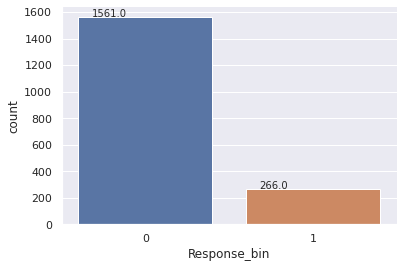

In [100]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
ax = sns.countplot(y_test)
annot_plot_num(ax,0.08,1)

##SVC

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
# print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[1561  266]
 [   0    0]]
accuracy_score: 0.8544061302681992
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1827
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1827
   macro avg       0.50      0.43      0.46      1827
weighted avg       1.00      0.85      0.92      1827

Cross validation test_score 0.8573971128970188


##Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
cfm = confusion_matrix(rfc_pred,y_test)
print(cfm)
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)

# print('Cross validation train_score',cross_val_score_rfc['train_score'].mean())
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[1555    0]
 [   6  266]]
Accuracy score: 0.9967159277504105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1555
           1       1.00      0.98      0.99       272

    accuracy                           1.00      1827
   macro avg       1.00      0.99      0.99      1827
weighted avg       1.00      1.00      1.00      1827

Cross validation test_score 0.9960313335973805


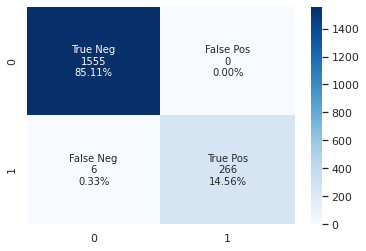

In [103]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues')

##**Feature Importance**

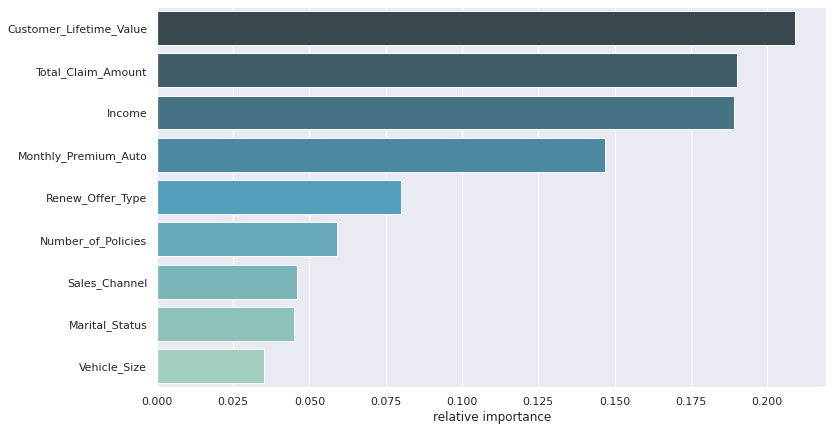

In [109]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='GnBu_d')
plt.xlabel('relative importance')
plt.show()

In [37]:
pip install rfpimp

     |████████████████████████████████| 153kB 4.1MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=86cde665e9dd04ed7b8bf4dcb4df05a1c5e4c23f235abaa21ecdf101a43dece2
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.3-cp36-none-any.whl size=22699 sha256=6b82e41378ebb6f9859828c8c2f92e6b484c11c8a864608df71c51aa1c0a43dc
  Stored in directory: /root/.cache/pip/wheels/91/3b/c3/9dcafed446985efb9008de84b720ddf003ac963e6807e8ad15
Successfully built rfpimp stratx


In [110]:
from rfpimp import *
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


df = all_data_df

df_train, df_test = train_test_split(df, test_size=0.20)

features = ['State','Customer Lifetime Value','Response_bin','Coverage','Education','EmploymentStatus','Gender','Income','Location Code','Marital Status','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Policy Type','Policy','Renew Offer Type','Sales Channel','Total Claim Amount','Vehicle Class','Vehicle Size',
            'Response_bin']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Response_bin',axis=1), df_train['Response_bin']
X_test, y_test = df_test.drop('Response_bin',axis=1), df_test['Response_bin']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

KeyError: ignored